In [34]:
import pandas as pd
from datetime import datetime
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [35]:
QRDQN_ep_len = pd.read_csv('./data/QRDQN/QRDQN_ep_len.csv')
QRDQN_ep_rew = pd.read_csv('./data/QRDQN/QRDQN_ep_rew.csv')
QRDQN_wins = pd.read_csv('./data/QRDQN/QRDQN_matches_won.csv')
QRDQN_losses = pd.read_csv('./data/QRDQN/QRDQN_matches_lost.csv')
QRDQN_wins = QRDQN_wins.set_index('Step')
QRDQN_losses = QRDQN_losses.set_index('Step')
QRDQN_ep_rew = QRDQN_ep_rew.set_index('Step')
QRDQN_ep_len = QRDQN_ep_len.set_index('Step')

In [36]:
DQN_ep_len = pd.read_csv('./data/DQN/ryu_ep_len.csv')
DQN_ep_rew = pd.read_csv('./data/DQN/ryu_ep_rew.csv')
DQN_wins = pd.read_csv('./data/DQN/ryu_matches_won.csv')
DQN_losses = pd.read_csv('./data/DQN/ryu_matches_lost.csv')
DQN_wins = DQN_wins.set_index('Step')
DQN_losses = DQN_losses.set_index('Step')
DQN_ep_rew = DQN_ep_rew.set_index('Step')
DQN_ep_len = DQN_ep_len.set_index('Step')

In [37]:
PPO_ep_len = pd.read_csv('./data/PPO/ryu_ep_len.csv')
PPO_ep_rew = pd.read_csv('./data/PPO/ryu_ep_rew.csv')
PPO_ep_rew = PPO_ep_rew.set_index('Step')
PPO_ep_len = PPO_ep_len.set_index('Step')

In [38]:
QRDQN_wins = QRDQN_wins.rename({'Value':'Wins'},axis=1)
QRDQN_losses = QRDQN_losses.rename({'Value':'Losses'},axis=1)
QRDQN_wins = QRDQN_wins.drop(['Wall time'], axis=1)
QRDQN_losses = QRDQN_losses.drop(['Wall time'], axis=1)

QRDQN_win_perc = QRDQN_wins.join(QRDQN_losses)
QRDQN_win_perc['Percent'] = QRDQN_win_perc['Wins'] / (QRDQN_win_perc['Wins'] + QRDQN_win_perc['Losses'])
# display(QRDQN_win_perc)

In [39]:
DQN_wins = DQN_wins.rename({'Value':'Wins'},axis=1)
DQN_losses = DQN_losses.rename({'Value':'Losses'},axis=1)
DQN_wins = DQN_wins.drop(['Wall time'], axis=1)
DQN_losses = DQN_losses.drop(['Wall time'], axis=1)

DQN_win_perc = DQN_wins.join(DQN_losses)
DQN_win_perc['Percent'] = DQN_win_perc['Wins'] / (DQN_win_perc['Wins'] + DQN_win_perc['Losses'])

Win Percentage

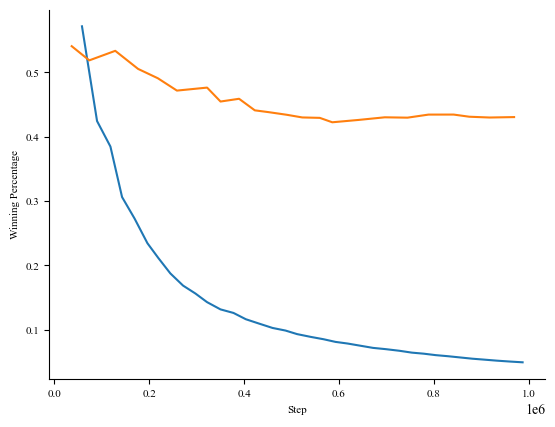

In [40]:
fig, ax1 = plt.subplots()
ax1.plot(QRDQN_win_perc.index, QRDQN_win_perc['Percent'])
ax1.plot(DQN_win_perc.index, DQN_win_perc['Percent'])
plt.xlabel('Step',fontsize=8)
ax1.spines[['right','top']].set_visible(False)
plt.ylabel('Winning Percentage',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.rcParams["font.family"]="Times New Roman"
plt.show()

Mean Reward

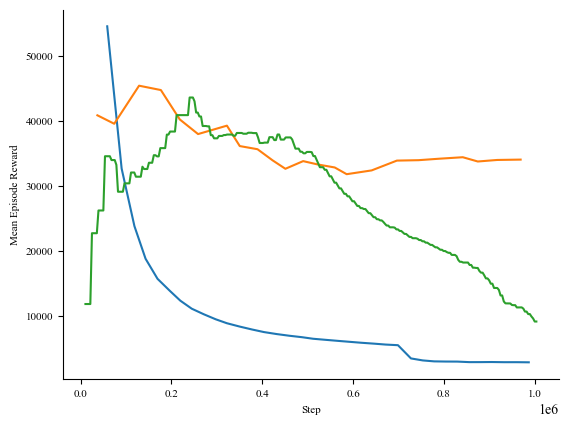

In [45]:
fig, ax1 = plt.subplots()
ax1.plot(QRDQN_ep_rew.index, QRDQN_ep_rew['Value'])
ax1.plot(DQN_ep_rew.index, DQN_ep_rew['Value'])
ax1.plot(PPO_ep_rew.index, PPO_ep_rew['Value'])
plt.xlabel('Step',fontsize=8)
ax1.spines[['right','top']].set_visible(False)
plt.ylabel('Mean Episode Reward',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.rcParams["font.family"]="Times New Roman"
plt.show()

Episode Length

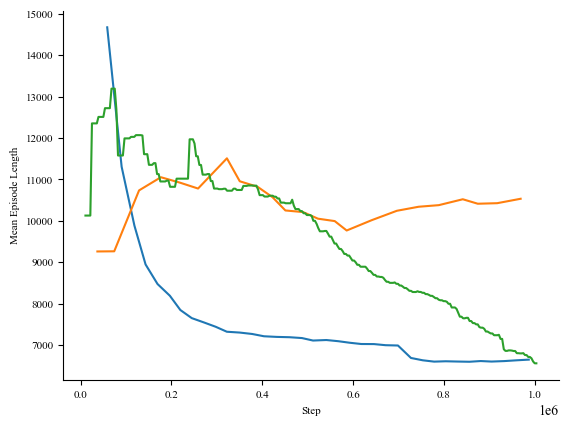

In [46]:
fig, ax1 = plt.subplots()
ax1.plot(QRDQN_ep_len.index, QRDQN_ep_len['Value'])
ax1.plot(DQN_ep_len.index, DQN_ep_len['Value'])
ax1.plot(PPO_ep_len.index, PPO_ep_len['Value'])
plt.xlabel('Step',fontsize=8)
ax1.spines[['right','top']].set_visible(False)
plt.ylabel('Mean Episode Length',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.rcParams["font.family"]="Times New Roman"
plt.show()

Episode Length and Reward

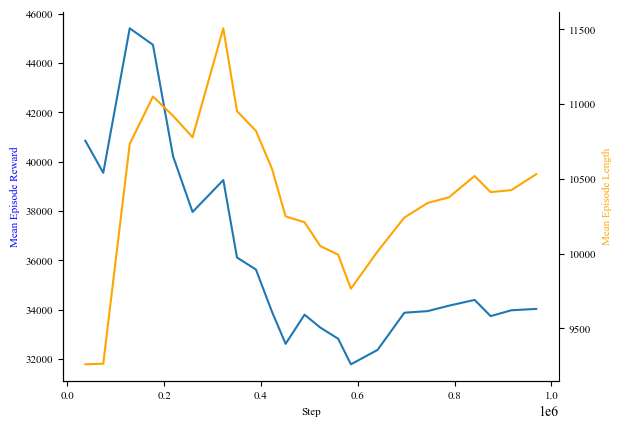

In [51]:
fig, ax1 = plt.subplots()
ax1.plot(DQN_ep_rew.index, DQN_ep_rew['Value'])
# ax1.plot(PPO_ep_len.index, PPO_ep_len['Value'])
plt.xlabel('Step',fontsize=8)
ax1.spines[['right','top']].set_visible(False)
plt.ylabel('Mean Episode Reward',fontsize=8,color='b')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.rcParams["font.family"]="Times New Roman"
ax2 = ax1.twinx()
ax2.spines[['top']].set_visible(False)
ax2.plot(DQN_ep_len.index, DQN_ep_len['Value'],color='orange')
ax2.set_ylabel('Mean Episode Length',fontsize=8,color='orange')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.rcParams["font.family"]="Times New Roman"
plt.show()

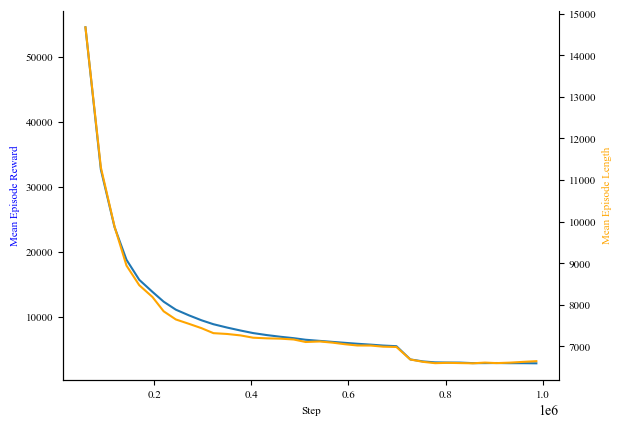

In [52]:
fig, ax1 = plt.subplots()
ax1.plot(QRDQN_ep_rew.index, QRDQN_ep_rew['Value'])
# ax1.plot(PPO_ep_len.index, PPO_ep_len['Value'])
plt.xlabel('Step',fontsize=8)
ax1.spines[['right','top']].set_visible(False)
plt.ylabel('Mean Episode Reward',fontsize=8,color='b')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.rcParams["font.family"]="Times New Roman"
ax2 = ax1.twinx()
ax2.spines[['top']].set_visible(False)
ax2.plot(QRDQN_ep_len.index, QRDQN_ep_len['Value'],color='orange')
ax2.set_ylabel('Mean Episode Length',fontsize=8,color='orange')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.rcParams["font.family"]="Times New Roman"
plt.show()

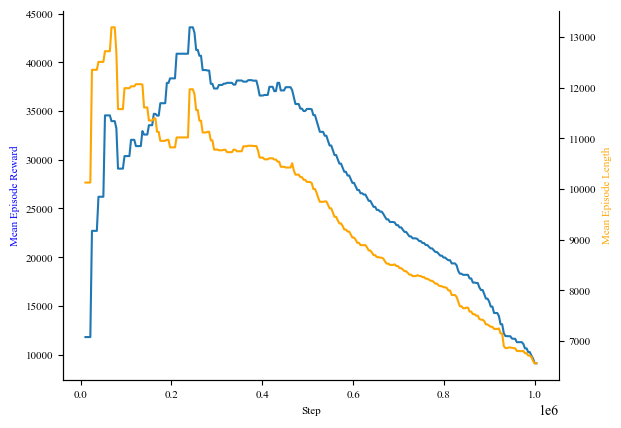

In [53]:
fig, ax1 = plt.subplots()
ax1.plot(PPO_ep_rew.index, PPO_ep_rew['Value'])
# ax1.plot(PPO_ep_len.index, PPO_ep_len['Value'])
plt.xlabel('Step',fontsize=8)
ax1.spines[['right','top']].set_visible(False)
plt.ylabel('Mean Episode Reward',fontsize=8,color='b')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.rcParams["font.family"]="Times New Roman"
ax2 = ax1.twinx()
ax2.spines[['top']].set_visible(False)
ax2.plot(PPO_ep_len.index, PPO_ep_len['Value'],color='orange')
ax2.set_ylabel('Mean Episode Length',fontsize=8,color='orange')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.rcParams["font.family"]="Times New Roman"
plt.show()